In [1]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
from sklearn.decomposition import PCA
import numpy as np

N_DENSE = 2
L=8

In [2]:
user = 1
if user == 1:
    prefix_data = "/home/owen/repos/"
elif user == 2:
    prefix_data = "/Users/omyers/repos/"

In [3]:
df_bins = pd.read_csv("{prefix_data}z3support/data/SpinMLData/2DIsing/L-{L}/L-{L}-T-1-5/bins_L-{L}-T-1-5.txt".format(L=L,prefix_data=prefix_data), sep="\t")
df_conf = pd.read_csv("{prefix_data}z3support/data/SpinMLData/2DIsing/L-{L}/L-{L}-T-1-5/spinConfigs_L-{L}-T-1-5.txt".format(L=L,prefix_data=prefix_data), delimiter=r"\s+", header=None)

In [4]:
df_bins

,# L,T,binNum,E,ESq,AccRate_local,AccRate_clust,sigma,absSigma
0,8,1,1,-1.997375,3.989828125,0.0007203125,1,0.05003125,0.99934375
1,8,1,2,-1.998,3.9922734375,0.00071953125,1,0.03378125,0.99946875
2,8,1,3,-1.996,3.9845625,0.0007496875,1,-0.03578125,0.99896875
3,8,1,4,-1.9974375,3.99008203125,0.00073109375,1,-0.09196875,0.99934375
4,8,1,5,-1.9974375,3.99008203125,0.0007084375,1,0.08396875,0.99934375
...,...,...,...,...,...,...,...,...,...
4999,8,5,996,-0.435125,0.2342109375,0.6916240625,1,0.012375,0.1696875
5000,8,5,997,-0.4463125,0.23892578125,0.6923890625,1,0.02065625,0.17459375
5001,8,5,998,-0.431,0.2245078125,0.69159796875,1,-0.00934375,0.16890625
5002,8,5,999,-0.42225,0.21940625,0.69218546875,1,-0.004875,0.1698125


In [5]:
df_bins.iloc[1000][1]

' T '

In [6]:
df_bins = df_bins[df_bins[' T '] != ' T ']

In [7]:
df_bins = df_bins.astype(
    {
        " T ": int,
        " binNum": int,
    }
)

In [8]:
df_conf

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1,-1,-1,-1,-1,-1,-1,-1,1,1,...,-1,-1,-1,-1,-1,-1,1,-1,1,1
4996,1,1,1,-1,-1,1,1,1,1,1,...,-1,1,1,1,-1,-1,1,1,1,1
4997,1,1,-1,-1,1,1,-1,-1,-1,-1,...,1,-1,1,-1,-1,-1,-1,1,-1,-1
4998,1,-1,1,1,1,-1,1,-1,1,-1,...,1,1,1,-1,1,1,-1,-1,-1,-1


## Get the temp and magnatization into the configuration dataframe

In [9]:
df_conf["T"] = df_bins[" T "]

In [10]:
df_conf.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63, 'T'],
      dtype='object')

In [11]:
mean_col = df_conf[0].copy()
for i in range(1, L):
    mean_col += df_conf[i]

mean_col /= L

In [12]:
df_conf["M"] = mean_col

In [13]:
#filterned_confs = df_conf[(df_conf["T"] < 1.5) | (df_conf["T"] > 4.5)]
filterned_confs = df_conf

In [14]:
filterned_confs.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,T,M
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1.0,-1.0
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1.0,-1.0
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1.0,-1.0
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1.0,-1.0
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1.0,-1.0


In [15]:
img_pca = PCA(n_components=N_DENSE)

In [16]:
img_pca.fit(filterned_confs.drop(["T","M"], axis=1).sample(frac=1))

PCA(n_components=2)

In [17]:
components = img_pca.transform(filterned_confs.drop(["T","M"], axis=1))

In [18]:
components.shape

(5000, 2)

In [19]:
filterned_confs["T"]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4995    5.0
4996    5.0
4997    5.0
4998    5.0
4999    5.0
Name: T, Length: 5000, dtype: float64

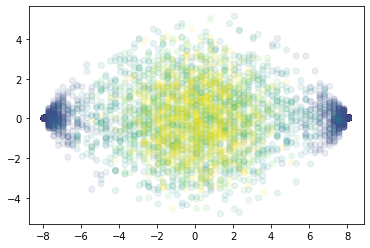

In [20]:
plt.scatter(components[:,0], components[:,1], c=pd.to_numeric(filterned_confs["T"]), alpha=0.1)

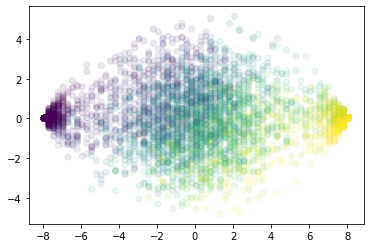

In [21]:
plt.scatter(components[:,0], components[:,1], c=pd.to_numeric(filterned_confs["M"]), alpha=0.1)

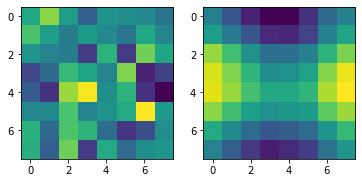

In [22]:
fig_pca, axes_pca = plt.subplots(1,N_DENSE)
for i, ax in enumerate(axes_pca.flat):
    ax.imshow(img_pca.components_[i].reshape(L,L))

In [23]:
df_components = pd.DataFrame(data={"c0": components[:,0], "c1": components[:,1], "T": pd.to_numeric(filterned_confs["T"])})

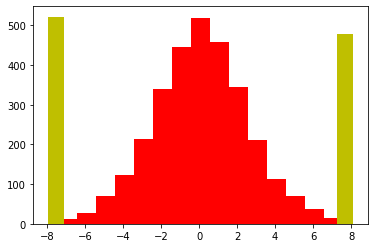

In [24]:
component_number = 0
plt.hist(df_components[df_components["T"] > 2]["c{}".format(component_number)], bins=15, color="r")
plt.hist(df_components[df_components["T"] < 2]["c{}".format(component_number)], bins=20, color="y")
plt.show()

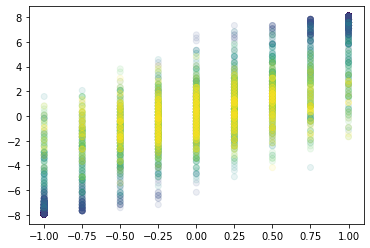

In [25]:
plt.scatter(pd.to_numeric(filterned_confs["M"]), components[:,0], c=pd.to_numeric(filterned_confs["T"]), alpha=0.1)

# Simple Autoencoder

In [45]:
simp_ae = tf.keras.Sequential(
    [
        keras.layers.InputLayer(input_shape=(L*L,)),
        keras.layers.Dense(N_DENSE, use_bias=False, name='latent_space'),
        keras.layers.Dense(L*L),
    ]
)


In [46]:
simp_ae.output_shape

(None, 64)

In [47]:
simp_ae.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
latent_space (Dense)         (None, 2)                 128       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                192       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [54]:
tb_callback = keras.callbacks.TensorBoard(
    log_dir='tb_log_dir_notebook',
    histogram_freq=2,  
    write_graph=True,
    write_images=True
)

2022-05-03 08:34:38.644688: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-05-03 08:34:38.644717: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-05-03 08:34:38.697707: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-05-03 08:34:38.697817: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [55]:
simp_ae.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [56]:
simp_ae.fit(
    batch_size=16,
    x=filterned_confs.drop(["T","M"], axis=1),
    y=filterned_confs.drop(["T","M"], axis=1),
    epochs=100,
    callbacks=[tb_callback]
)

Epoch 1/100
  2/313 [..............................] - ETA: 22s - loss: 0.6422 - mae: 0.6474

2022-05-03 08:34:41.601172: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-05-03 08:34:41.601192: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-05-03 08:34:41.677745: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-05-03 08:34:41.677905: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


180/313 [================>.............] - ETA: 0s - loss: 0.5527 - mae: 0.5587

2022-05-03 08:34:41.820964: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 62 callback api events and 59 activity events. 
2022-05-03 08:34:41.822116: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-05-03 08:34:41.823413: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: tb_log_dir_notebook/train/plugins/profile/2022_05_03_08_34_41

2022-05-03 08:34:41.824311: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to tb_log_dir_notebook/train/plugins/profile/2022_05_03_08_34_41/owen-PRIME-Z390-A.trace.json.gz
2022-05-03 08:34:41.826576: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: tb_log_dir_notebook/train/plugins/profile/2022_05_03_08_34_41

2022-05-03 08:34:41.826981: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to tb_log_dir_not

313/313 [==============================] - 1s 2ms/step - loss: 0.5492 - mae: 0.5549
Epoch 2/100
313/313 [==============================] - 0s 856us/step - loss: 0.5492 - mae: 0.5548
Epoch 3/100
313/313 [==============================] - 0s 861us/step - loss: 0.5492 - mae: 0.5548
Epoch 4/100
313/313 [==============================] - 0s 859us/step - loss: 0.5492 - mae: 0.5550
Epoch 5/100
313/313 [==============================] - 0s 815us/step - loss: 0.5492 - mae: 0.5550
Epoch 6/100
313/313 [==============================] - 0s 837us/step - loss: 0.5492 - mae: 0.5548
Epoch 7/100
313/313 [==============================] - 0s 843us/step - loss: 0.5492 - mae: 0.5550
Epoch 8/100
313/313 [==============================] - 0s 938us/step - loss: 0.5492 - mae: 0.5549
Epoch 9/100
313/313 [==============================] - 0s 819us/step - loss: 0.5492 - mae: 0.5549
Epoch 10/100
313/313 [==============================] - 0s 836us/step - loss: 0.5492 - mae: 0.5548
Epoch 11/100
313/313 [===========

In [57]:
mid_layer = simp_ae.get_layer('latent_space')

In [58]:
mid_layer.get_weights()[0].shape

(64, 2)

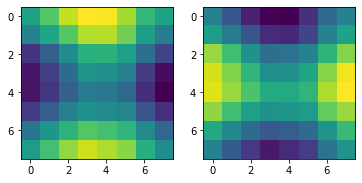

In [60]:
fig, axes = plt.subplots(1,N_DENSE)
for i, ax in enumerate(axes.flat):
    ax.imshow(mid_layer.get_weights()[0][:,-(i+1)].reshape(8,8))

# Simple Autoencoder with Reshape

In [ ]:
simp_ae = tf.keras.Sequential(
    [
        keras.layers.InputLayer(input_shape=(L, L, 1)),
        keras.layers.Flatten(),
        keras.layers.Dense(N_DENSE, use_bias=False, name='latent_space'),
        keras.layers.Dense(units=L*L),
        keras.layers.Reshape(target_shape=(L, L, 1))
    ]
)